In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from pyflann import *
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import roc_curve, auc
import cv2
import csv
import re
from sklearn.ensemble import RandomForestClassifier
import json
from tqdm import tqdm_notebook
import seaborn as sns
import xgboost as xgb

# %matplotlib notebook

coordinate_header = ['FrameNumber', 'MouthHook_x', 'MouthHook_y', 'LeftMHhook_x', 'LeftMHhook_y',
                     'RightMHhook_x', 'RightMHhook_y', 'LeftDorsalOrgan_x', 'LeftDorsalOrgan_y',
                     'RightDorsalOrgan_x', 'RightDorsalOrgan_y', 'CenterBolwigOrgan_x', 'CenterBolwigOrgan_y',
                     'LeftBolwigOrgan_x', 'LeftBolwigOrgan_y', 'RightBolwigOrgan_x', 'RightBolwigOrgan_y']

distance_header = ['MouthHook', 'LeftMHhook',
                   'RightMHhook', 'LeftDorsalOrgan', 'RightDorsalOrgan',
                   'CenterBolwigOrgan', 'LeftBolwigOrgan', 'RightBolwigOrgan']

project_dir="G:/My Drive/CRG_Dropbox/AljoComputer/Temp"
dir_keypoints="../expts/KeypointsAndDescriptors/validKeyPoints"
dir_descriptors="../expts/KeypointsAndDescriptors/descriptors"

C:\Users\Shaul\Anaconda2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
annotation_list = '../expts/annotation_list'
all_annotations = []
with open(annotation_list) as test_list:
    for annotation_file in test_list:
        annotation_file = project_dir + re.sub(".*/20180417_BG57_Midpoint_200micron_30fps/", "/", annotation_file.strip())
        with open(annotation_file) as fin_annotation:
            annotation = json.load(fin_annotation)
            all_annotations.extend(annotation["Annotations"])

print "len(all_annotations):", len(all_annotations)

gt = pd.DataFrame([])
descs = []
for ind, annotation in enumerate(all_annotations):
    parent, file_name = os.path.split(annotation['FrameFile'])
    file_name = os.path.splitext(file_name)[0]
    _, parent_name = os.path.split(parent)
    gt.loc[ind, 'FrameIndex'] = int(annotation['FrameIndexVideo'])
    gt.loc[ind, 'FileName'] = str(file_name.strip())
    gt.loc[ind, 'ParentName'] = str(parent_name.strip())
    for bp in annotation['FrameValueCoordinates']:
        if bp['Name'] == 'LeftDorsalOrgan':
            if (bp['Value']['x_coordinate'] != -1) and (bp['Value']['y_coordinate'] != -1):
                gt.loc[ind, 'LeftDorsalOrgan'] = 1
            else:
                gt.loc[ind, 'LeftDorsalOrgan'] = 0
        elif bp['Name'] == 'RightDorsalOrgan':
            if (bp['Value']['x_coordinate'] != -1) and (bp['Value']['y_coordinate'] != -1):
                gt.loc[ind, 'RightDorsalOrgan'] = 1
            else:
                gt.loc[ind, 'RightDorsalOrgan'] = 0
    desc_file = os.path.join(dir_descriptors, str(parent_name.strip()), str(file_name.strip() + '.csv'))
    try:
        temp = pd.read_csv(desc_file, sep='\t', header=None)
        descs.append(temp.values)
    except:
        temp = pd.DataFrame(np.zeros((1, 128)))
        descs.append(temp.values)
        continue

print "len(descs):", len(descs)        

len(all_annotations): 2613
len(descs): 2613


CrossVal Round 1
Training.......



[0]	eval-auc:0.719782	train-auc:0.743268
[1]	eval-auc:0.743766	train-auc:0.770712
[2]	eval-auc:0.757766	train-auc:0.785291
[3]	eval-auc:0.763592	train-auc:0.793344
[4]	eval-auc:0.772296	train-auc:0.8041
[5]	eval-auc:0.776405	train-auc:0.808996
[6]	eval-auc:0.780579	train-auc:0.814907
[7]	eval-auc:0.784487	train-auc:0.820527
[8]	eval-auc:0.78782	train-auc:0.82468
[9]	eval-auc:0.790736	train-auc:0.828192
[10]	eval-auc:0.793115	train-auc:0.831674
[11]	eval-auc:0.795464	train-auc:0.834412
[12]	eval-auc:0.798212	train-auc:0.838152
[13]	eval-auc:0.801306	train-auc:0.842156
[14]	eval-auc:0.803791	train-auc:0.845786
[15]	eval-auc:0.80622	train-auc:0.849515
[16]	eval-auc:0.80773	train-auc:0.852072
[17]	eval-auc:0.809896	train-auc:0.854952
[18]	eval-auc:0.811814	train-auc:0.858103
[19]	eval-auc:0.813166	train-auc:0.860304
[20]	eval-auc:0.814875	train-auc:0.862936
[21]	eval-auc:0.81654	train-auc:0.865064
[22]	eval-auc:0.817541	train-auc:0.867119
[23]	eval-auc:0.819077	train-auc:0.869671
[24]	eva


CrossVal Round 2
Training.......



[0]	eval-auc:0.709584	train-auc:0.737199
[1]	eval-auc:0.734688	train-auc:0.766185
[2]	eval-auc:0.744844	train-auc:0.7788
[3]	eval-auc:0.757305	train-auc:0.794242
[4]	eval-auc:0.762839	train-auc:0.801169
[5]	eval-auc:0.767703	train-auc:0.807359
[6]	eval-auc:0.770431	train-auc:0.811567
[7]	eval-auc:0.774038	train-auc:0.816344
[8]	eval-auc:0.776001	train-auc:0.81988
[9]	eval-auc:0.778756	train-auc:0.823491
[10]	eval-auc:0.781206	train-auc:0.827292
[11]	eval-auc:0.784973	train-auc:0.832117
[12]	eval-auc:0.787676	train-auc:0.835725
[13]	eval-auc:0.789749	train-auc:0.838678
[14]	eval-auc:0.791655	train-auc:0.841292
[15]	eval-auc:0.793206	train-auc:0.843698
[16]	eval-auc:0.795035	train-auc:0.846451
[17]	eval-auc:0.797795	train-auc:0.850334
[18]	eval-auc:0.799328	train-auc:0.852675
[19]	eval-auc:0.800753	train-auc:0.85533
[20]	eval-auc:0.802714	train-auc:0.857962
[21]	eval-auc:0.804053	train-auc:0.860317
[22]	eval-auc:0.805355	train-auc:0.862354
[23]	eval-auc:0.806868	train-auc:0.864485
[24]	


CrossVal Round 3
Training.......



[0]	eval-auc:0.699133	train-auc:0.732193
[1]	eval-auc:0.713549	train-auc:0.749213
[2]	eval-auc:0.731176	train-auc:0.768935
[3]	eval-auc:0.743732	train-auc:0.782466
[4]	eval-auc:0.750772	train-auc:0.79161
[5]	eval-auc:0.757114	train-auc:0.799156
[6]	eval-auc:0.76315	train-auc:0.806571
[7]	eval-auc:0.764937	train-auc:0.80952
[8]	eval-auc:0.767861	train-auc:0.813636
[9]	eval-auc:0.77212	train-auc:0.818892
[10]	eval-auc:0.775271	train-auc:0.823057
[11]	eval-auc:0.777929	train-auc:0.826087
[12]	eval-auc:0.780554	train-auc:0.829883
[13]	eval-auc:0.78299	train-auc:0.833448
[14]	eval-auc:0.785356	train-auc:0.83599
[15]	eval-auc:0.786864	train-auc:0.838306
[16]	eval-auc:0.788776	train-auc:0.841515
[17]	eval-auc:0.790643	train-auc:0.844048
[18]	eval-auc:0.792394	train-auc:0.847146
[19]	eval-auc:0.79409	train-auc:0.849739
[20]	eval-auc:0.796313	train-auc:0.853282
[21]	eval-auc:0.797616	train-auc:0.855133
[22]	eval-auc:0.798884	train-auc:0.857213
[23]	eval-auc:0.800852	train-auc:0.86008
[24]	eval


CrossVal Round 4
Training.......



[0]	eval-auc:0.70733	train-auc:0.730254
[1]	eval-auc:0.728395	train-auc:0.756638
[2]	eval-auc:0.745758	train-auc:0.776877
[3]	eval-auc:0.751678	train-auc:0.784971
[4]	eval-auc:0.759372	train-auc:0.793974
[5]	eval-auc:0.7641	train-auc:0.799748
[6]	eval-auc:0.767453	train-auc:0.80382
[7]	eval-auc:0.770606	train-auc:0.809088
[8]	eval-auc:0.77317	train-auc:0.813732
[9]	eval-auc:0.775573	train-auc:0.81769
[10]	eval-auc:0.777716	train-auc:0.82108
[11]	eval-auc:0.780586	train-auc:0.824206
[12]	eval-auc:0.783549	train-auc:0.828486
[13]	eval-auc:0.785366	train-auc:0.831677
[14]	eval-auc:0.787291	train-auc:0.834618
[15]	eval-auc:0.789153	train-auc:0.8373
[16]	eval-auc:0.790975	train-auc:0.84017
[17]	eval-auc:0.792575	train-auc:0.842632
[18]	eval-auc:0.793766	train-auc:0.844965
[19]	eval-auc:0.795552	train-auc:0.847758
[20]	eval-auc:0.797194	train-auc:0.850162
[21]	eval-auc:0.798734	train-auc:0.852779
[22]	eval-auc:0.80041	train-auc:0.855219
[23]	eval-auc:0.801972	train-auc:0.857511
[24]	eval-au


CrossVal Round 5
Training.......



[0]	eval-auc:0.719989	train-auc:0.745438
[1]	eval-auc:0.745935	train-auc:0.773651
[2]	eval-auc:0.754337	train-auc:0.783579
[3]	eval-auc:0.764622	train-auc:0.794873
[4]	eval-auc:0.769961	train-auc:0.801552
[5]	eval-auc:0.774225	train-auc:0.806461
[6]	eval-auc:0.779266	train-auc:0.813173
[7]	eval-auc:0.783702	train-auc:0.818971
[8]	eval-auc:0.786849	train-auc:0.823475
[9]	eval-auc:0.790365	train-auc:0.82831
[10]	eval-auc:0.792447	train-auc:0.831222
[11]	eval-auc:0.794174	train-auc:0.833839
[12]	eval-auc:0.796562	train-auc:0.83743
[13]	eval-auc:0.798945	train-auc:0.840809
[14]	eval-auc:0.80126	train-auc:0.84444
[15]	eval-auc:0.802577	train-auc:0.8463
[16]	eval-auc:0.804359	train-auc:0.848629
[17]	eval-auc:0.806697	train-auc:0.851846
[18]	eval-auc:0.808086	train-auc:0.853973
[19]	eval-auc:0.810458	train-auc:0.857149
[20]	eval-auc:0.811576	train-auc:0.859282
[21]	eval-auc:0.813181	train-auc:0.8621
[22]	eval-auc:0.814788	train-auc:0.864418
[23]	eval-auc:0.816247	train-auc:0.866594
[24]	eval

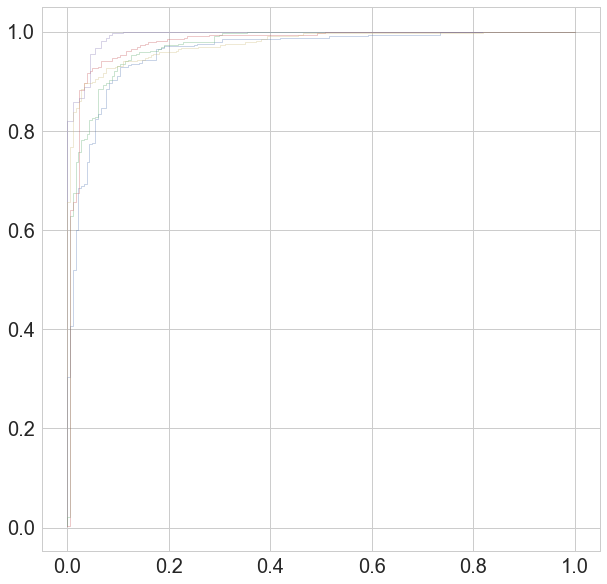

In [3]:
from __future__ import print_function

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from scipy import interp


param = {'max_depth': 8, 'n_estimators': 16, 'eta': 0.1, 'silent': 1, 'objective': 'binary:logistic'}
param['nthread'] = 20
param['eval_metric'] = 'auc'
num_round = 128

bp = 'LeftDorsalOrgan'
X = gt.index.values
y = gt.loc[:, bp]
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []
cv = StratifiedKFold(n_splits=5)
sns.set(style="whitegrid", font_scale=2)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

cnt = 0
for train, test in cv.split(X, y):
    print('CrossVal Round', cnt+1)
    X_train = X[train]
    y_train = y[train]
    X_train_2, X_eval, y_train_2, y_eval = train_test_split(X_train, y_train, test_size=0.30, random_state=42)
    
    print('Training.......')
    train_desc = np.zeros((0,128))
    train_labels = np.zeros((0,1))
    for i in tqdm_notebook(X_train_2):
        train_desc = np.r_[train_desc, descs[i]]
        train_labels = np.r_[train_labels, np.tile(gt.loc[i, bp], (np.shape(descs[i])[0], 1))]
    
    eval_desc = np.zeros((0,128))
    eval_labels = np.zeros((0,1))
    for i in tqdm_notebook(X_eval):
        eval_desc = np.r_[eval_desc, descs[i]]
        eval_labels = np.r_[eval_labels, np.tile(gt.loc[i, bp], (np.shape(descs[i])[0], 1))]
    
    deval = xgb.DMatrix(eval_desc, label=np.ravel(eval_labels))
    dtrain = xgb.DMatrix(train_desc, label=np.ravel(train_labels))
    evallist = [(deval, 'eval'), (dtrain, 'train')]
    bst = xgb.train(param, dtrain, num_round, evallist)
    
    print('Testing.......')
    test_desc = np.zeros((0,128))
    test_labels = np.zeros((0,1))
    probas_ = []
    for i in tqdm_notebook(test):
        pred = bst.predict(xgb.DMatrix(descs[i]))
        probas_.append(np.mean(pred))
        test_labels = np.r_[test_labels, np.reshape(np.array([gt.loc[i, bp]]), (1,1))]

    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(test_labels, np.array(probas_))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (cnt, roc_auc))
    cnt += 1

# tprs_mat = np.array(tprs)
# tprs_mat.dump("tprs_mat_LDO_depth8.dat")

# aucs_mat = np.array(aucs)
# aucs_mat.dump("aucs_mat_LDO_depth8.dat")

# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#          label='Luck', alpha=.8)

# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# std_auc = np.std(aucs)
# plt.plot(mean_fpr, mean_tpr, color='b',
#          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
#          lw=2, alpha=.8)

# std_tpr = np.std(tprs, axis=0)
# tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
# tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                  label=r'$\pm$ 1 std. dev.')

# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# # plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right", frameon=False)
# sns.despine()
# plt.axis('scaled')
# plt.savefig("CrossVal_ROC_10_Fold_LDO_depth8.png", format='png', dpi=300, bbox_inches='tight')
# plt.savefig("CrossVal_ROC_10_Fold_LDO_depth8.pdf", format='pdf', dpi=300, bbox_inches='tight')
# plt.show()

In [4]:
sda

NameError: name 'sda' is not defined

In [ ]:
from __future__ import print_function

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from scipy import interp

X = gt.index.values
y = gt.loc[:, 'RightDorsalOrgan']
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []
cv = StratifiedKFold(n_splits=5)
sns.set(style="whitegrid", font_scale=2)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

## Best parameters based on gridSearch are 64 and 100
# rf = RandomForestClassifier(max_depth=64, n_estimators=128, n_jobs=16)
# rf = RandomForestClassifier(max_depth=32, n_estimators=64, n_jobs=16)
rf = RandomForestClassifier(max_depth=16, n_estimators=32, n_jobs=16)

cnt = 0
for train, test in cv.split(X, y):
    print('CrossVal Round', cnt+1)
    train_desc = np.zeros((0,128))
    train_labels = np.zeros((0,1))
    print('Training.......')
    for i in tqdm_notebook(train):
        train_desc = np.r_[train_desc, descs[i]]
        train_labels = np.r_[train_labels, np.tile(gt.loc[i, 'RightDorsalOrgan'], (np.shape(descs[i])[0], 1))]
    rf.fit(train_desc, np.ravel(train_labels))
    
    print('Testing.......')
    test_desc = np.zeros((0,128))
    test_labels = np.zeros((0,1))
    probas_ = []
    for i in tqdm_notebook(test):
        pred = rf.predict(descs[i])
        probas_.append(np.mean(pred))
        test_labels = np.r_[test_labels, np.reshape(np.array([gt.loc[i, 'RightDorsalOrgan']]), (1,1))]

    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(test_labels, np.array(probas_))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (cnt, roc_auc))
    cnt += 1

tprs_mat = np.array(tprs)
tprs_mat.dump("tprs_mat_RDO_depth16.dat")

aucs_mat = np.array(aucs)
aucs_mat.dump("aucs_mat_RDO_depth16.dat")

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right", frameon=False)
sns.despine()
plt.axis('scaled')
plt.savefig("CrossVal_ROC_10_Fold_RDO_depth16.png", format='png', dpi=300, bbox_inches='tight')
plt.savefig("CrossVal_ROC_10_Fold_RDO_depth16.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print(asfasfag)

In [ ]:
from __future__ import print_function

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from scipy import interp

X = gt.index.values
y = gt.loc[:, 'LeftDorsalOrgan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

nsplits = 3
cv = StratifiedKFold(n_splits=nsplits)

# Set the parameters by cross-validation
tuned_parameters = {'max_depth': [16, 32, 64, 128, 256],
                     'n_estimators': [1, 10, 100, 1000]}

scores = ['precision', 'recall']

mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []

tprs = []

grid_precision = np.zeros((nsplits, len(tuned_parameters['max_depth']),
                      len(tuned_parameters['n_estimators'])))
grid_recall = np.zeros((nsplits, len(tuned_parameters['max_depth']),
                      len(tuned_parameters['n_estimators'])))
grid_f1 = np.zeros((nsplits, len(tuned_parameters['max_depth']),
                      len(tuned_parameters['n_estimators'])))
grid_auc = np.zeros((nsplits, len(tuned_parameters['max_depth']),
                      len(tuned_parameters['n_estimators'])))

sp = -1
for train, test in cv.split(X_train, y_train):
    sp += 1
    train_desc = np.zeros((0,128))
    train_labels = np.zeros((0,1))
    for i in train:
        train_desc = np.r_[train_desc, descs[i]]
        train_labels = np.r_[train_labels, np.tile(gt.loc[i, 'LeftDorsalOrgan'], (np.shape(descs[i])[0], 1))]
    
    for i_est, est in enumerate(tuned_parameters['n_estimators']):
        for i_dep, dep in enumerate(tuned_parameters['max_depth']):
            rf = RandomForestClassifier(max_depth=dep, n_estimators=est)
            rf.fit(train_desc, np.ravel(train_labels))
            
            test_desc = np.zeros((0,128))
            test_labels = np.zeros((0,1))
            probas_ = []
            for i in test:
                pred = rf.predict(descs[i])
                probas_.append(np.mean(pred))
                test_labels = np.r_[test_labels, np.reshape(np.array([gt.loc[i, 'LeftDorsalOrgan']]), (1,1))]

            # Compute ROC curve and area the curve
            fpr, tpr, thresholds = roc_curve(test_labels, np.array(probas_))
            grid_auc[sp, i_dep, i_est] = auc(fpr, tpr)
            
#             prec, recl, f1, _ = precision_recall_fscore_support(test_labels, np.array(probas_), average='weighted')
#             grid_precision[sp, i_dep, i_est] = prec.copy()
#             grid_precision[sp, i_dep, i_est] = recl.copy()
#             grid_precision[sp, i_dep, i_est] = f1.copy()

grid_auc.dump("grid_auc_10.dat")
mat2 = np.load("grid_auc_10.dat")

In [ ]:
# df = pd.DataFrame(np.c_[thresholds.T, fpr.T, tpr.T], columns=['Threshold', 'FPR', 'TPR'])
# df.loc[:, 'FPR'] = df.loc[:, 'FPR'].copy()*100
# df.loc[:, 'TPR'] = df.loc[:, 'TPR'].copy()*100
# df.loc[:, ['TPR', 'FPR']] = df.loc[:, ['TPR', 'FPR']].round(0).copy()
# tol_cutoff = 10.0

# optimal_votes = df[df['FPR'] == tol_cutoff].iloc[0, 0]
# optimal_tpr = df[df['FPR'] == tol_cutoff].iloc[0, 2]
# optimal_fpr = df[df['FPR'] == tol_cutoff].iloc[0, 1]

# print 'Optimal votes at %d percent FPR : %0.2f '%(optimal_fpr, optimal_votes) 
# print 'TPR at Optimal votes : ', optimal_tpr


In [ ]:
# det = np.zeros_like(votes_use)
# pos_frames = np.where(votes_use >= optimal_votes)
# neg_frames = np.where(votes_use < optimal_votes)
# det[pos_frames] = 1

In [ ]:
# out_vid = 'temp.avi'
# video_crop = cv2.VideoWriter(out_vid, 0, 5, (1920, 1920))
# cap = cv2.VideoCapture(video_file)

# first_frame = gt.index.values[0]
# ind = -1
# for frame_index, row in gt.iterrows():
#     ind += 1
#     if cap.isOpened():
#         cap.set(1, frame_index)
#         ret, frame = cap.read()
#         if (ret == True):
#             if votes_use[ind] >= optimal_votes:
#                 cv2.circle(frame, (1800, 200), radius=30, color=(0, 255, 0), thickness=-1)
#             else:
#                 cv2.circle(frame, (1800, 200), radius=30, color=(0, 0, 255), thickness=-1)

#             video_crop.write(frame)
#     else:
#         print 'Cap Not Opened'
#         cap.release()

# cap.release()
# cv2.destroyAllWindows()
# video_crop.release()

In [ ]:
# gt = {}
# fpr = {}
# tpr = {}
# thresholds = {}
# roc_auc = {}

# train_data_pos = get_train_data(train_pos.copy())
# train_data_neg = get_train_data(train_neg.copy())

# fig_roc = plt.figure(figsize=(14, 12))
# patch_sizes = np.arange(4, 17, 2)
# patch_sigmas = np.arange(0.1, 11, 1)
# detected_loc = {}
# for vote_patch in patch_sizes:
#     for vote_sigma in patch_sigmas:
#         detected_loc = predict_locations_patchsize(train_data_pos, test_annotations, vote_patch, vote_sigma)
#         gt, fpr, tpr, thresholds, roc_auc = plot_roc_curve_metrics(detected_loc, no_anno_df, ['Sum'])
#         plt.plot(fpr, tpr, lw=2, label='R-%d S-%d (AUC = %0.2f)'%(vote_patch, vote_sigma, roc_auc))

# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# # plt.title(bp)
# plt.legend(loc="lower right", frameon=False)
# plt.show()

In [ ]:
# train_data_pos = get_train_data(train_pos.copy())
# detected_loc = predict_locations(train_data_pos, test_annotations)

# ground_truth = detected_loc.iloc[:, 17:].astype(dtype=np.uint16).copy()
# ground_truth.loc[:, :] = 1
# for rind, rval in no_anno_df.iterrows():
#     if rval['index'] in detected_loc.index.values:
#         ground_truth.loc[rval['index'], rval['col']+'_votes'] = 0
# votes_use = detected_loc.iloc[:, 17:].astype(dtype=np.float32).copy()
    
# y_true = ground_truth['LeftDorsalOrgan_votes'].values
# y_score = votes_use['LeftDorsalOrgan_votes'].values

# # make y_true a boolean vector
# y_true = (y_true == 1)

# # sort scores and corresponding truth values
# desc_score_indices = np.argsort(y_score, kind="mergesort")[::-1]
# y_score = y_score[desc_score_indices]
# y_true = y_true[desc_score_indices]
# weight = 1.

# # y_score typically has many tied values. Here we extract
# # the indices associated with the distinct values. We also
# # concatenate a value for the end of the curve.
# distinct_value_indices = np.where(np.diff(y_score))[0]
# threshold_idxs = np.r_[distinct_value_indices, y_true.size - 1]

# # accumulate the true positives with decreasing threshold
# # tps = stable_cumsum(y_true * weight)[threshold_idxs]
# tps = np.cumsum(y_true * weight)[threshold_idxs]
# fps = 1 + threshold_idxs - tps

# # return fps, tps, y_score[threshold_idxs]

# fpr = fps / fps[-1]
# tpr = tps / tps[-1]


In [ ]:
# temp_coordinates = all_coordinates.loc[:, all_coordinates.columns.values[::2]]
# total_negatives = temp_coordinates[temp_coordinates<0].count()
# total_positives = temp_coordinates[temp_coordinates>=0].count()
# posneg_df = pd.DataFrame([total_positives, total_negatives])
# posneg_df.columns = distance_header
# posneg_df.index = ['pos', 'neg']
# posneg_df

In [ ]:
# vote_patch_size = 30
# vote_sigma = 15
# bodypart_vote = np.zeros((2 * vote_patch_size + 1, 2 * vote_patch_size + 1), np.float)

# for x in range(-vote_patch_size, vote_patch_size + 1):
#     for y in range(-vote_patch_size, vote_patch_size + 1):
#         bodypart_vote[y + vote_patch_size, x + vote_patch_size] = np.exp(-0.5 * (
#             x * x + y * y) / (np.square(vote_sigma))) / (vote_sigma * np.sqrt(2 * np.pi))

# imgplot = plt.imshow(bodypart_vote, cmap="hot")
# plt.colorbar()